# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller  # for stationarity tests
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
import matplotlib as plt

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../data/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:
sensor.isna().sum() # no data missing



attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:
sensor.info() # 11 columns, 1751 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       1751 non-null   float64
 1   attitude.pitch      1751 non-null   float64
 2   attitude.yaw        1751 non-null   float64
 3   gravity.x           1751 non-null   float64
 4   gravity.y           1751 non-null   float64
 5   gravity.z           1751 non-null   float64
 6   rotationRate.x      1751 non-null   float64
 7   rotationRate.y      1751 non-null   float64
 8   rotationRate.z      1751 non-null   float64
 9   userAcceleration.x  1751 non-null   float64
 10  userAcceleration.y  1751 non-null   float64
 11  userAcceleration.z  1751 non-null   float64
dtypes: float64(12)
memory usage: 164.3 KB


In [33]:
print(f"Test data range: {test.min()} to {test.max()}")
print(f"Test data std: {test.std()}")
print(f"Test data range: {train.min()} to {train.max()}")
print(f"Test data std: {train.std()}")

Test data range: -0.300361 to 0.149749
Test data std: 0.143932387825403
Test data range: -1.3988200000000002 to 1.760975
Test data std: 0.3443584427448621


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:
sensor["date"] = pd.date_range(start="1/1/2018 00:00:00", end="1/1/2018 00:29:10", periods=len(sensor))

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,date
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,2018-01-01 00:00:00
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,2018-01-01 00:00:01
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,2018-01-01 00:00:02
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,2018-01-01 00:00:03
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,2018-01-01 00:00:04


Assign the time series index to the dataframe's index.

In [10]:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
date,,,,,,,,,,,,
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

AttributeError: module 'matplotlib' has no attribute 'show'

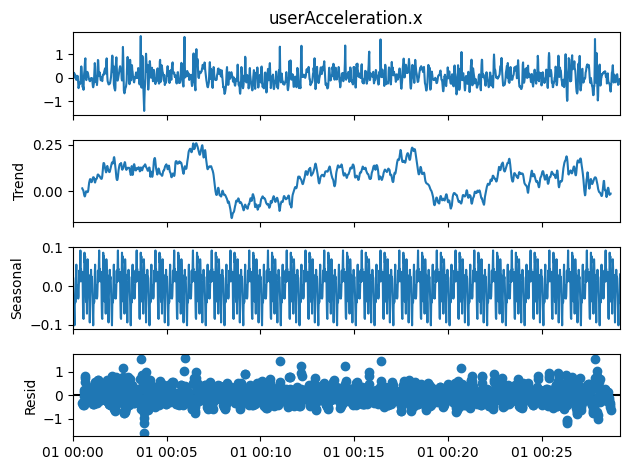

In [11]:
import statsmodels.api as sm

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model='additive', period=60)

# Plot it
decomposition.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

AttributeError: module 'matplotlib' has no attribute 'show'

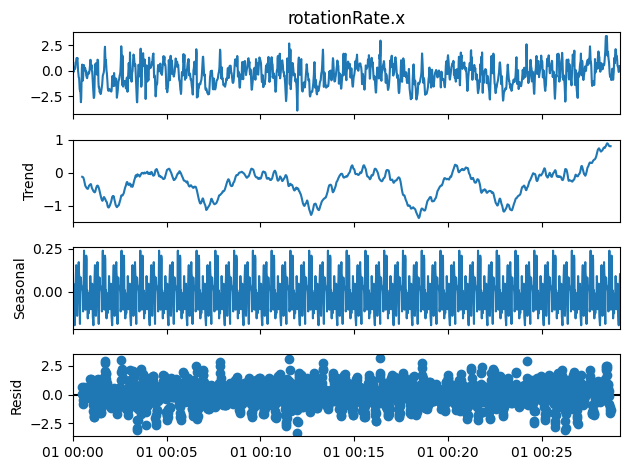

In [12]:
import statsmodels.api as sm

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model='additive', period=60)

# Plot it
decomposition.plot()
plt.show()

## Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

AttributeError: module 'matplotlib' has no attribute 'show'

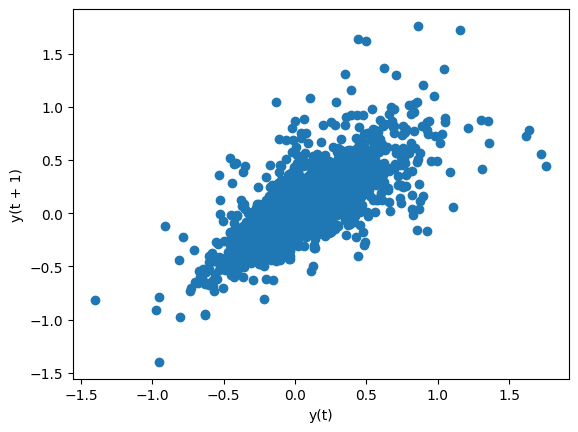

In [13]:
# Your code here:

from pandas.plotting import lag_plot

lag_plot(sensor['userAcceleration.x'])
plt.show()

Create a lag plot for `rotationRate.x`

AttributeError: module 'matplotlib' has no attribute 'show'

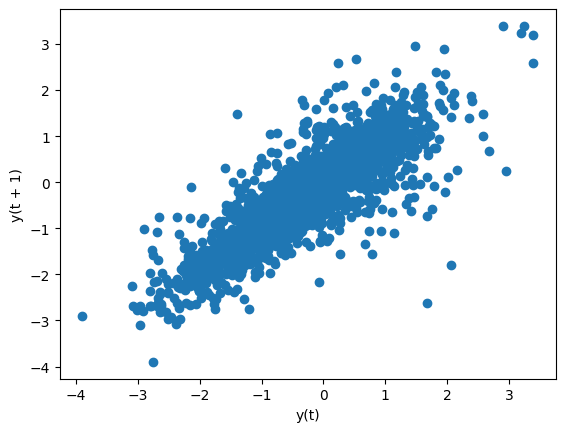

In [ ]:
# Your code here:

from pandas.plotting import lag_plot

lag_plot(sensor['rotationRate.x']) 
plt.show()

What are your conclusions from both visualizations?

In [ ]:
# Your conclusions here:

# Conclusions: positive autocorrelation: today's value is strongly related to yesterday's value.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
result = adfuller(sensor['userAcceleration.x'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -17.957994086169755
p-value: 2.8234394830374825e-30


In [16]:
from statsmodels.tsa.stattools import adfuller

# Test for stationarity
result = adfuller(sensor['rotationRate.x'])

# Print the results
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.269860625086424
p-value: 6.320230335912084e-06


What are your conclusions from this test?

In [ ]:
# How to interpret:
# p-value < 0.05 -> data is stationary (reject the null hypothesis)
# p-value > 0.05 -> data is NOT stationary (fail to reject null)

# userAcceleration.x < 0.05 -> data is stationary (reject the null hypothesis) 
# rotationRate.x < 0.05 -> data is stationary (reject the null hypothesis) 

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [20]:
from statsmodels.tsa.arima.model import ARIMA

# ARMA is just ARIMA with d=0 (no differencing)
# ARMA(p, q) = ARIMA(p, 0, q)
model = ARIMA(sensor['userAcceleration.x'], order=(2, 0, 1))  # ARMA(1,1) as an example
model_fit = model.fit()

# View the summary
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:     userAcceleration.x   No. Observations:                 1751
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 379.399
Date:                Wed, 01 Oct 2025   AIC                           -748.798
Time:                        11:42:13   BIC                           -721.458
Sample:                    01-01-2018   HQIC                          -738.692
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0625      0.016      3.930      0.000       0.031       0.094
ar.L1          0.9888      0.036     27.766      0.000       0.919       1.059
ar.L2         -0.3788      0.032    -11.686      0.0

In [22]:
# Split chronologically - say 80/20
train_size = int(len(sensor) * 0.8)

train = sensor['userAcceleration.x'][:-10]
test = sensor['userAcceleration.x'][-10:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

Train size: 1741
Test size: 10


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [31]:
from statsmodels.tools.eval_measures import rmse

# Fit model on training data
model = ARIMA(train, order=(2, 0, 1))
model_fit = model.fit()

# Predict the next 10 values
predictions = model_fit.forecast(steps=10)

# Calculate RMSE
rmse_value = rmse(test, predictions)
print(f"RMSE: {rmse_value}")

RMSE: 0.2252916045023592
